<a href="https://colab.research.google.com/github/mofuoku417/Machine-Learning-Techniques-for-Multivariate-Time-Series-Forecasting-of-Crude-Palm-Oil-Prices/blob/main/MV_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from pandas import read_csv
path = 'https://raw.githubusercontent.com/mofuoku417/multivariate-time-series-prediction-of-crude-palm-oil-price-data-science-approach/main/cleaned_data/preprocessed.csv'
df = read_csv(path, header=None)
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

KeyError: ignored

In [ ]:
#df = pd.read_csv("https://raw.githubusercontent.com/mofuoku417/multivariate-time-series-prediction-of-crude-palm-oil-price-data-science-approach/main/cleaned_data/preprocessed.csv")
 #removed unwanted column
#df.drop(["Unnamed: 0"], axis=1, inplace=True)
#df.head()

,Date,cpo_pri,cno_pri,rps_pri,pno_pri,sbo_pri,wti_spri
0,2002-02-01,323.0,455.0,423.45,844.0,468.0,28.67
1,2002-03-01,345.0,546.0,415.85,799.0,485.0,24.49
2,2002-04-01,362.0,595.0,410.77,718.0,466.0,22.06
3,2002-05-01,376.0,636.0,414.82,614.0,442.0,21.64
4,2002-06-01,383.0,738.0,451.04,619.0,429.0,22.30


In [ ]:
date_rng = pd.date_range(start='2002-02', end='2021-08', freq='MS')
df['Date'] = pd.DataFrame(date_rng, columns=['Date'])

In [ ]:
df['Date'] = df['Date'].apply(pd.to_datetime)
df['index'] = pd.DataFrame(date_rng, columns=['Date'])

In [ ]:
#Rearrange columns
df = df[['index', 'cpo_pri','cno_pri', 'rps_pri', 'pno_pri', 'sbo_pri', 'wti_spri']]

In [ ]:
df.set_index('Date', inplace=True)
split_date = '2016-09' #'2017-06' 
df_training = df.loc[df.index <= split_date]
df_test = df.loc[df.index > split_date]
print(f"{len(df_training)} days of training months \n {len(df_test)} months of testing data ")
df_training_len = 184

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
def build_regressor(optimizer='adam', lr=0.001):
  regressor = Sequential()
  regressor.add(Dense(units = 5 , kernel_initializer='random_uniform', activation= 'relu'))
  regressor.add(Dense(units = 5 , kernel_initializer='random_uniform', activation= 'relu'))
  regressor.add(Dense(units = 1 , kernel_initializer='random_uniform', activation= 'sigmoid'))
  regressor.compile(optimizer=optimizer , loss = 'mse', 
  metrics=['accuracy'])
  return regressor
KR = KerasRegressor(build_fn=build_regressor)
parameters = {'batch_size' : [10,30],
              'lr' : [0.001, 0.1],
          'epochs' : [50,100],
          'optimizer':['adam','SGD']}
grid_search = GridSearchCV(estimator = KR, param_grid = parameters, n_jobs=-1, scoring='accuracy',cv=5, return_train_score=True, verbose=0)
grid_search.fit(X_train,y_train)

grid_search.fit(X_train, np.ravel(y_train))

ypred = grid_search.predict(X_test)

print ([y_test, ypred])
print('Best Parameters : ',grid_search.best_params_)

In [ ]:
model = KerasClassifier(
build_fn=create_model,
epochs=epochs,
verbose=1)

optimizer_candidates = [Adam, RMSprop]
lr_candidates = [1e-3, 5e-3, 1e-4]
batch_size = [128, 64]


param_grid = {
    "optimizer": optimizer_candidates,
    "lr": lr_candidates,
    "batch-size": batch_size}

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    n_jobs=1,
    verbose=1,
    cv=3)

grid_result = grid.fit(x_train, y_train)

In [ ]:
def define_model(lr, momentum):
    model = models.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr, momentum), metrics='accuracy')

    return model

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation 
from keras.layers.recurrent import SimpleRNN

In [ ]:
rnn = Sequential()
rnn.add(SimpleRNN(activation='relu',units=6,input_shape=(1,1)))
rnn.add(Dense(activation='linear',units=1))

In [ ]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [ ]:
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
time_steps = 12
train_data, test_data, data = get_train_test(sunspots_url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [ ]:
train_data

array([0.22852638, 0.24665089, 0.2758077 , ..., 0.3506698 , 0.4546887 ,
       0.4862096 ], dtype=float32)

Epoch 1/20
187/187 - 1s - loss: 0.0494 - 1s/epoch - 6ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0174 - 292ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0117 - 308ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0085 - 308ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0069 - 347ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0057 - 300ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0051 - 298ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0049 - 310ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0046 - 285ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0046 - 285ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0043 - 321ms/epoch - 2ms/step
Epoch 12/20
187/187 - 0s - loss: 0.0042 - 297ms/epoch - 2ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0042 - 293ms/epoch - 2ms/step
Epoch 14/20
187/187 - 0s - loss: 0.0042 - 296ms/epoch - 2ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0040 - 315ms/epoch - 2ms/step
Epoch 16/20
187/187 - 0s - loss: 0.00

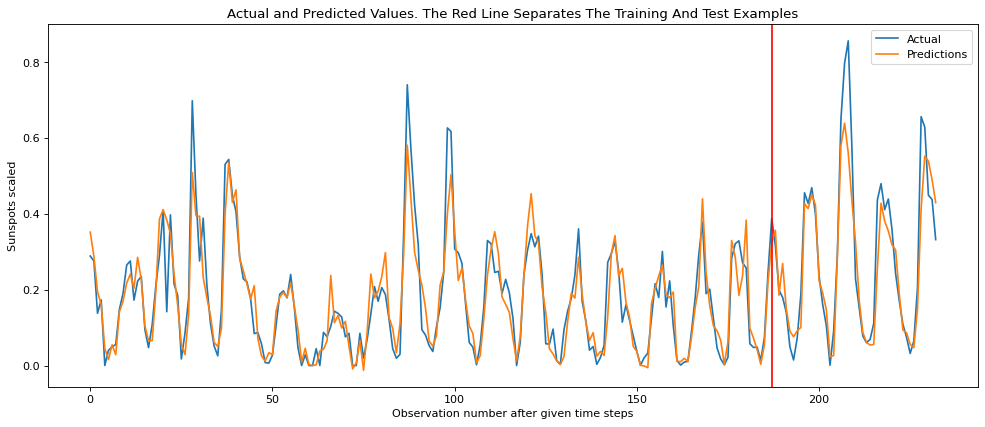

In [ ]:
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
 
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
 
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
time_steps = 12
train_data, test_data, data = get_train_test(sunspots_url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)
 
# Create model and train
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
 
# Print error
print_error(trainY, testY, train_predict, test_predict)
 
#Plot result
plot_result(trainY, testY, train_predict, test_predict)


In [ ]:
# Example of Dropout on the Sonar Dataset: Hidden Layer
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
 
# dropout in hidden layers with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=60, activation='relu', kernel_constraint=maxnorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(30, activation='relu', kernel_constraint=maxnorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(lr=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model
 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


ImportError: ignored

In [ ]:
#https://stackoverflow.com/questions/39171170/error-on-keras-simplernn-when-input-shape-is-specified-to-be-3-d
model = Sequential()
model.add(SimpleRNN(output_dim=1, input_shape=(1,1,1))
##Correction
#for clarity, my

#train_x.shape = (73, 84, 400)
#and

#vocab_size=400

model = Sequential()
model.add(SimpleRNN(output_dim=1, input_shape=(84,400))

In [ ]:
#https://stackoverflow.com/questions/57741714/how-to-define-input-dim-for-keras-recurrent-layers-properly
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN, Embedding
from keras import optimizers
from keras import losses
model = Sequential()
#model.add(Dense(units=5, input_dim=3, activation = 'tanh'))
model.add(SimpleRNN(units=5, input_dim = 3, activation = 'tanh'))
model.add(Dense(units=16, activation='tanh'))
model.add(Dense(1, activation='linear'))
prop = optimizers.rmsprop(lr=0.01)
sgd = optimizers.sgd(lr=0.01, nesterov=True, momentum=0.005)
model.compile(optimizer=prop, loss='mean_squared_error')
#ValueError: Error when checking input: expected simple_rnn_9_input to have 3 dimensions, but got array with shape (221079, 3)

#correction:
#When I use commented out Dense layer everything is just fine. 
# read Keras documentation and I see they are using Embedding layer. 
#Although, I do not really understand why Embedding layer is necessary to use recurrent layers like SimpleRNN or LSTM.
import numpy as  np
import numpy as  np

data = np.zeros((10,4))
X = data[:,0:3].reshape(-1,1,3)
y = data[:,3].reshape(-1,1)
print(X.shape)
print(y.shape)
#(10, 1, 3)
#(10, 1)

In [ ]:
model.add(Dense(8,
                input_dim = 2,
                activation = "tanh",
                use_bias = False))
model.add(SimpleRNN(2,
                    activation = "tanh",
                    use_bias = False))
model.add(Dense(1,
                activation = "tanh",
                use_bias = False))
#ERROR: ValueError: Input 0 is incompatible with layer simple_rnn_1: expected ndim=3, found ndim=2

That message means: the input going into the rnn has 2 dimensions, but an rnn layer expects 3 dimensions.

For an RNN layer, you need inputs shaped like (BatchSize, TimeSteps, FeaturesPerStep). These are the 3 dimensions expected.

A Dense layer (in keras 2) can work with either 2 or 3 dimensions. We can see that you're working with 2 because you passed an input_dim instead of passing an input_shape=(Steps,Features).

There are many possible ways to solve this, but the most meaningful and logical would be a case where your input data is a sequence with time steps.

Solution 1 - Your training data is a sequence:

If your training data is a sequence, you shape it like (NumberOfSamples, TimeSteps, Features) and pass it to your model. Make sure you use input_shape=(TimeSteps,Features) in the first layer instead of using 

Solution 2 - You reshape the output of the first dense layer so it has the additional dimension:

model.add(Reshape((TimeSteps,Features)))
Make sure that the product TimeSteps*Features is equal to 8, the output of your first dense layer.
Share

https://ustczen.gitbooks.io/keras/content/layers/recurrent.html. *********

In [ ]:
#Python Machine Learning: Machine Learning and Deep Learning with Python 